In [ ]:
import pandas as pd

df_indian = pd.read_csv("/content/drive/MyDrive/DataSets/IN_Data.xlsx - IN_Mobiles.csv")
df_japanese = pd.read_csv("/content/drive/MyDrive/DataSets/JPN Data.xlsx - CN_Mobiles.csv")

print("Indian dataset loaded successfully.")
print("Japanese dataset loaded successfully.")

Indian dataset loaded successfully.
Japanese dataset loaded successfully.


In [ ]:
print("Indian Dataset Info:")
print(df_indian.info())
print("\nIndian Dataset Head:")
print(df_indian.head())
print("\nIndian Dataset Description:")
print(df_indian.describe())

print("\nJapanese Dataset Info:")
print(df_japanese.info())
print("\nJapanese Dataset Head:")
print(df_japanese.head())
print("\nJapanese Dataset Description:")
print(df_japanese.describe())

Indian Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          70000 non-null  object
 1   CURR_AGE    70000 non-null  int64 
 2   GENDER      70000 non-null  object
 3   ANN_INCOME  70000 non-null  object
 4   DT_MAINT    70000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB
None

Indian Dataset Head:
           ID  CURR_AGE GENDER    ANN_INCOME   DT_MAINT
0  20710B05XL        54      M    1,425,390   4/20/2018
1  89602T51HX        47      M    1,678,954    6/8/2018
2  70190Z52IP        60      M      931,624   7/31/2017
3  25623V15MU        55      F    1,106,320   7/31/2017
4  36230I68CE        32      F      748,465   1/27/2019

Indian Dataset Description:
           CURR_AGE
count  70000.000000
mean      44.995314
std       11.822122
min       25.000000
25%       35.000000
50%       45.000000
75%      

Initial Cleaning

In [ ]:
# For Indian Dataset
df_indian['ANN_INCOME'] = df_indian['ANN_INCOME'].str.replace(',', '').astype(int)

# For Japanese Dataset
df_japanese['ANN_INCOME'] = df_japanese['ANN_INCOME'].str.replace(',', '').astype(int)

print("ANN_INCOME cleaned for both datasets.")
print(df_indian['ANN_INCOME'].dtype)
print(df_japanese['ANN_INCOME'].dtype)

ANN_INCOME cleaned for both datasets.
int64
int64


In [ ]:
import pandas as pd

# Convert DT_MAINT to datetime objects
df_indian['DT_MAINT'] = pd.to_datetime(df_indian['DT_MAINT'])

# Set the reference date (July 1, 2019)
reference_date = pd.to_datetime('2019-07-01')

# Calculate the difference in days
df_indian['DAYS_SINCE_MAINT'] = (reference_date - df_indian['DT_MAINT']).dt.days

# Now you can drop the original DT_MAINT column if you no longer need it
df_indian = df_indian.drop('DT_MAINT', axis=1)

print(df_indian.head())  # Check the new column
print(df_indian.info()) # Check info of the new column

           ID  CURR_AGE GENDER  ANN_INCOME  DAYS_SINCE_MAINT
0  20710B05XL        54      M     1425390               437
1  89602T51HX        47      M     1678954               388
2  70190Z52IP        60      M      931624               700
3  25623V15MU        55      F     1106320               700
4  36230I68CE        32      F      748465               155
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                70000 non-null  object
 1   CURR_AGE          70000 non-null  int64 
 2   GENDER            70000 non-null  object
 3   ANN_INCOME        70000 non-null  int64 
 4   DAYS_SINCE_MAINT  70000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB
None


In [ ]:
# Bin DAYS_SINCE_MAINT (Indian Dataset) - Choosing appropriate bins!
bins_days = [0, 200, 360, 500, float('inf')]
labels_days = [1, 2, 3, 4]  # Example labels
df_indian['DAYS_SINCE_MAINT_BINNED'] = pd.cut(df_indian['DAYS_SINCE_MAINT'], bins=bins_days, labels=labels_days, right=False)
df_indian = df_indian.drop('DAYS_SINCE_MAINT', axis=1)

In [ ]:
# One-hot encode GENDER (both datasets)
df_indian = pd.get_dummies(df_indian, columns=['GENDER'], drop_first=True)
df_japanese = pd.get_dummies(df_japanese, columns=['GENDER'], drop_first=True)

In [ ]:
# Japanese Dataset: Bin AGE_CAR (as before)
bins_age = [0, 200, 360, 500, float('inf')]
labels_age = [1, 2, 3, 4]
df_japanese['AGE_CAR_BINNED'] = pd.cut(df_japanese['AGE_CAR'], bins=bins_age, labels=labels_age, right=False)
df_japanese = df_japanese.drop('AGE_CAR', axis=1)

print("Indian Dataset:")
print(df_indian.head())
print(df_indian.info())

print("\nJapanese Dataset:")
print(df_japanese.head())
print(df_japanese.info())

Indian Dataset:
           ID  CURR_AGE  ANN_INCOME DAYS_SINCE_MAINT_BINNED  GENDER_M
0  20710B05XL        54     1425390                       3      True
1  89602T51HX        47     1678954                       3      True
2  70190Z52IP        60      931624                       4      True
3  25623V15MU        55     1106320                       4     False
4  36230I68CE        32      748465                       1     False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       70000 non-null  object  
 1   CURR_AGE                 70000 non-null  int64   
 2   ANN_INCOME               70000 non-null  int64   
 3   DAYS_SINCE_MAINT_BINNED  70000 non-null  category
 4   GENDER_M                 70000 non-null  bool    
dtypes: bool(1), category(1), int64(2), object(1)
memory usage: 1.7+ MB

EDA

Correlation Matrix:
            CURR_AGE  ANN_INCOME
CURR_AGE     1.00000     0.18489
ANN_INCOME   0.18489     1.00000


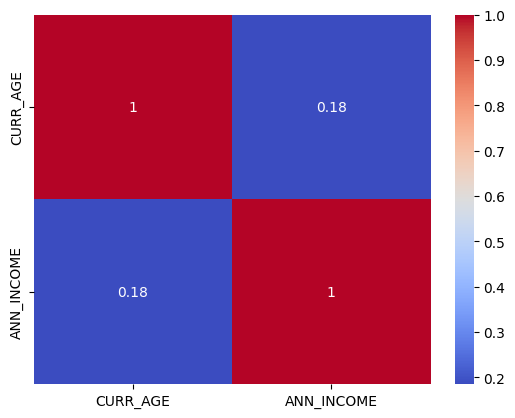

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Matrix (Numerical Features)
correlation_matrix = df_japanese[['CURR_AGE', 'ANN_INCOME']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

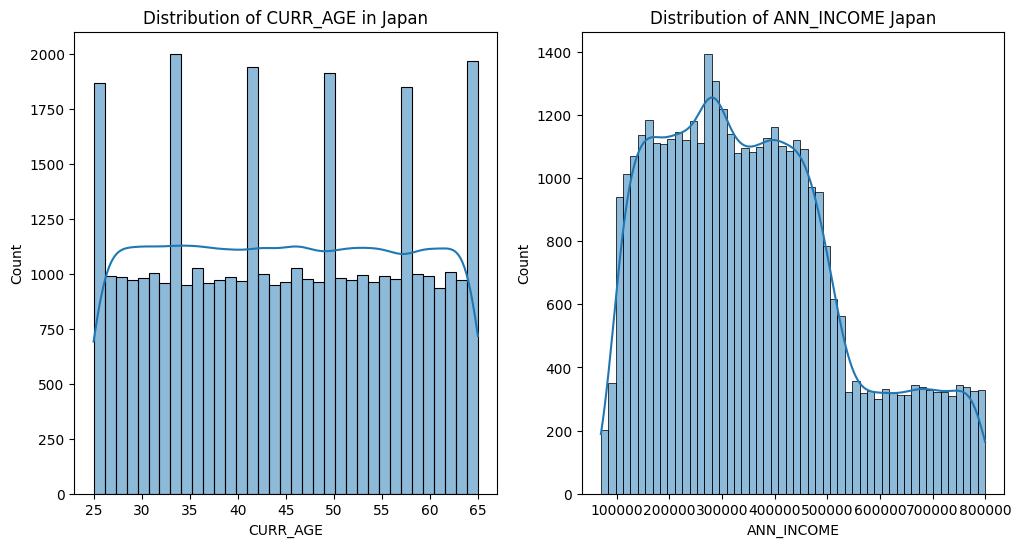

In [ ]:
# 2. Skewness (Numerical Features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_japanese['CURR_AGE'], kde=True)
plt.title('Distribution of CURR_AGE in Japan')
plt.subplot(1, 2, 2)
sns.histplot(df_japanese['ANN_INCOME'], kde=True)  # Check if the data is skewed
plt.title('Distribution of ANN_INCOME Japan')
plt.show()

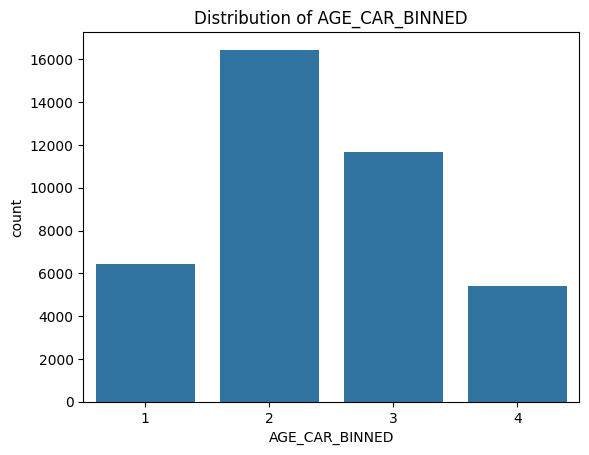

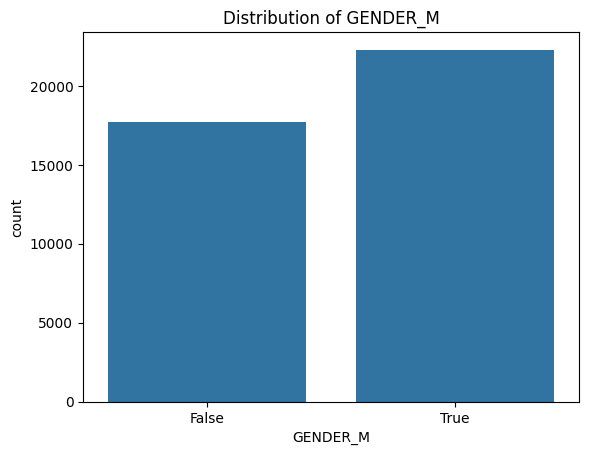

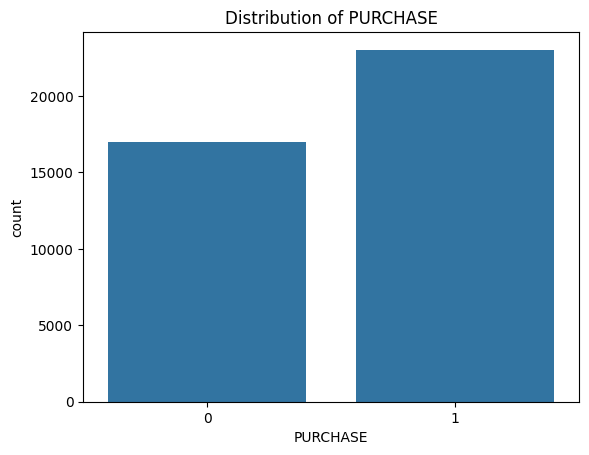

In [ ]:
# 3. Categorical Feature Exploration
categorical_features = ['AGE_CAR_BINNED', 'GENDER_M']
for feature in categorical_features:
    plt.figure()
    sns.countplot(x=feature, data=df_japanese)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 4. Target Variable Distribution (Japanese Dataset)
plt.figure()
sns.countplot(x='PURCHASE', data=df_japanese)
plt.title('Distribution of PURCHASE')
plt.show()


Correlation Matrix:
            CURR_AGE  ANN_INCOME
CURR_AGE    1.000000    0.137191
ANN_INCOME  0.137191    1.000000


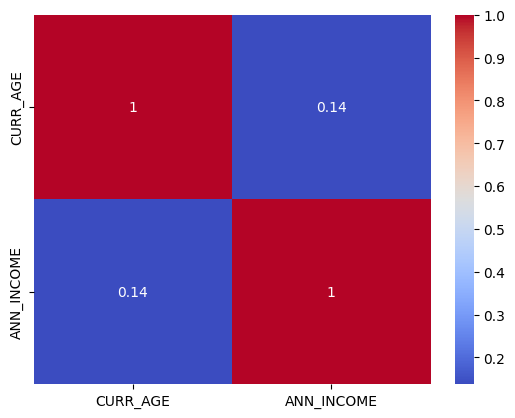

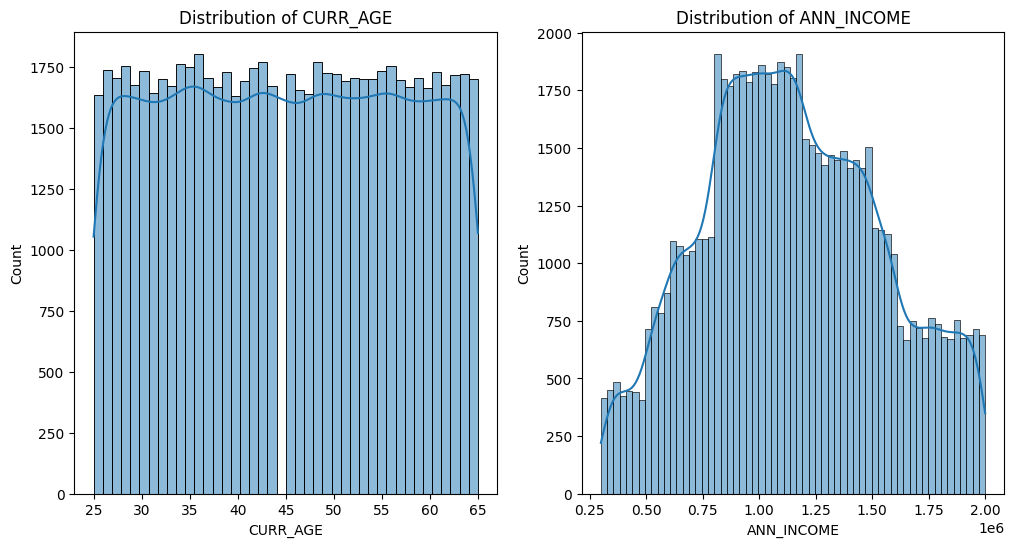

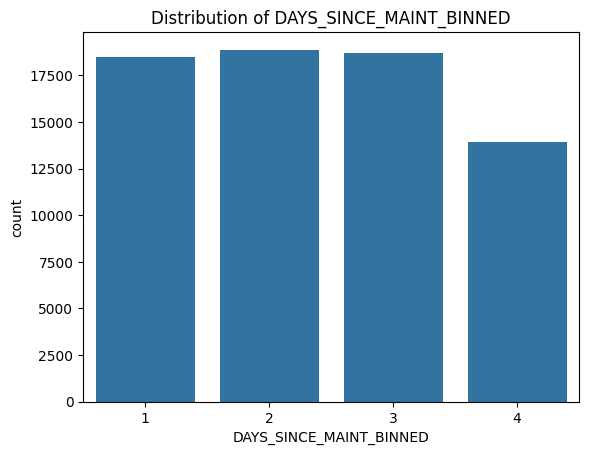

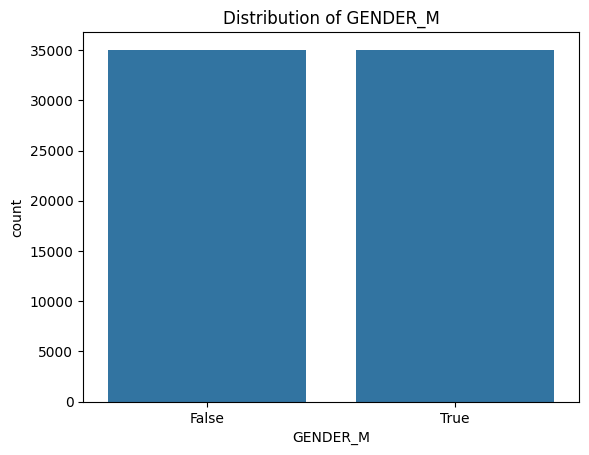

In [ ]:
#Repeat the above steps for Indian dataset as well.

# 1. Correlation Matrix (Numerical Features)
correlation_matrix = df_indian[['CURR_AGE', 'ANN_INCOME']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 2. Skewness (Numerical Features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_indian['CURR_AGE'], kde=True)
plt.title('Distribution of CURR_AGE')
plt.subplot(1, 2, 2)
sns.histplot(df_indian['ANN_INCOME'], kde=True)  # Check if the data is skewed
plt.title('Distribution of ANN_INCOME')
plt.show()

# 3. Categorical Feature Exploration
categorical_features = ['DAYS_SINCE_MAINT_BINNED', 'GENDER_M']
for feature in categorical_features:
    plt.figure()
    sns.countplot(x=feature, data=df_indian)
    plt.title(f'Distribution of {feature}')
    plt.show()

Annual Income log transformation

ANN_INCOME transformed (log1p) for both datasets.
Indian ANN_INCOME:
0    14.169957
1    14.333682
2    13.744686
3    13.916551
4    13.525781
Name: ANN_INCOME, dtype: float64

Japanese ANN_INCOME:
0    13.006605
1    11.586501
2    13.127924
3    13.280503
4    13.466980
Name: ANN_INCOME, dtype: float64


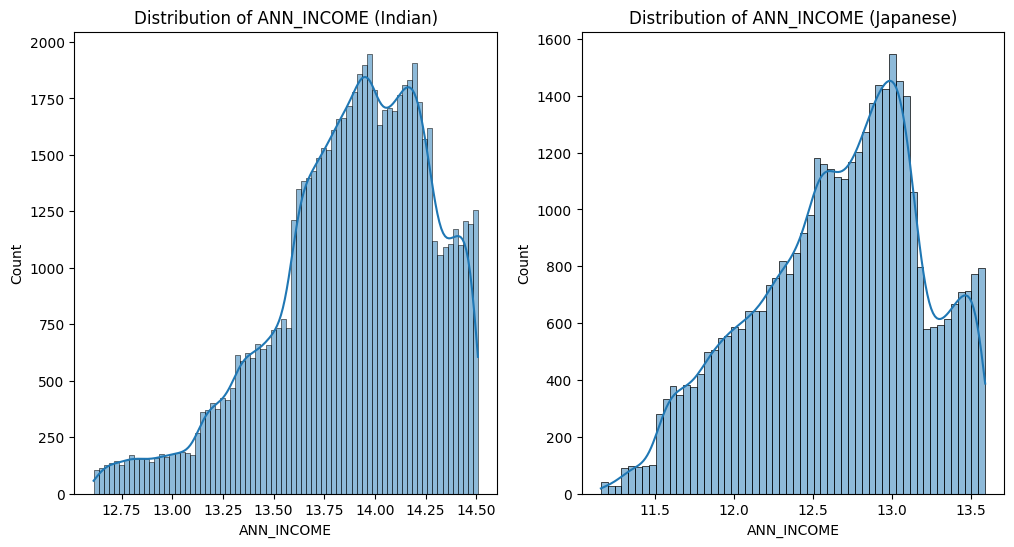

In [ ]:
import numpy as np
import pandas as pd

# Apply log transformation to ANN_INCOME (both datasets)
df_indian['ANN_INCOME'] = np.log1p(df_indian['ANN_INCOME'])  # log1p handles 0 values
df_japanese['ANN_INCOME'] = np.log1p(df_japanese['ANN_INCOME'])

print("ANN_INCOME transformed (log1p) for both datasets.")
print("Indian ANN_INCOME:")
print(df_indian['ANN_INCOME'].head())
print("\nJapanese ANN_INCOME:")
print(df_japanese['ANN_INCOME'].head())

# Check the distributions after the transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_indian['ANN_INCOME'], kde=True)  # Check if the data is skewed
plt.title('Distribution of ANN_INCOME (Indian)')
plt.subplot(1, 2, 2)
sns.histplot(df_japanese['ANN_INCOME'], kde=True)  # Check if the data is skewed
plt.title('Distribution of ANN_INCOME (Japanese)')
plt.show()

Model Training
1. Logistics Regression

Accuracy: 0.690875
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      3349
           1       0.75      0.71      0.73      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.69      0.69      8000
weighted avg       0.69      0.69      0.69      8000



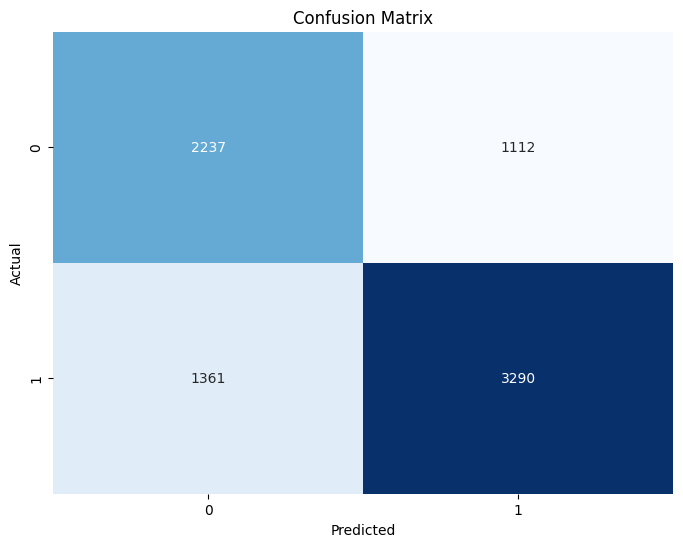

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for modeling (Japanese dataset)
X = df_japanese.drop(['ID', 'PURCHASE'], axis=1)  # Features (excluding ID and target)
y = df_japanese['PURCHASE']  # Target variable

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['AGE_CAR_BINNED'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters here later
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Random Forest

Random Forest Accuracy: 0.649375
              precision    recall  f1-score   support

           0       0.58      0.59      0.58      3349
           1       0.70      0.69      0.70      4651

    accuracy                           0.65      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.65      0.65      0.65      8000



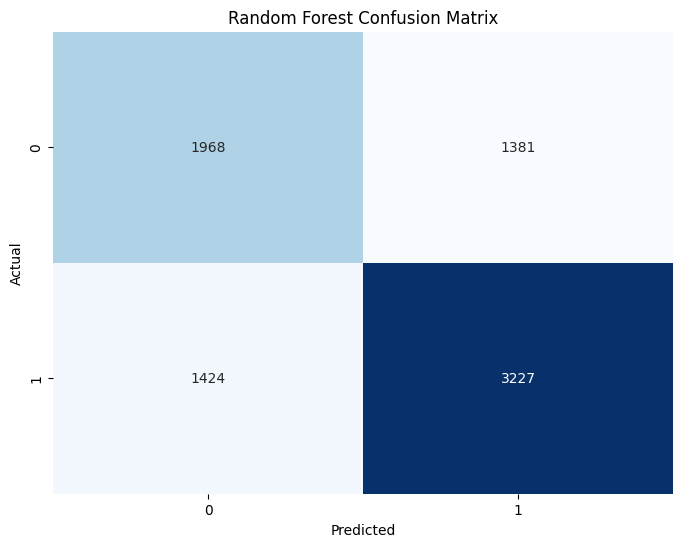

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data for modeling (Japanese dataset) - Same as before
X = df_japanese.drop(['ID', 'PURCHASE'], axis=1)
y = df_japanese['PURCHASE']
X = pd.get_dummies(X, columns=['AGE_CAR_BINNED'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here later
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

3. Gradient Boosting XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:58:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      3349
           1       0.74      0.74      0.74      4651

    accuracy                           0.70      8000
   macro avg       0.69      0.69      0.69      8000
weighted avg       0.70      0.70      0.70      8000



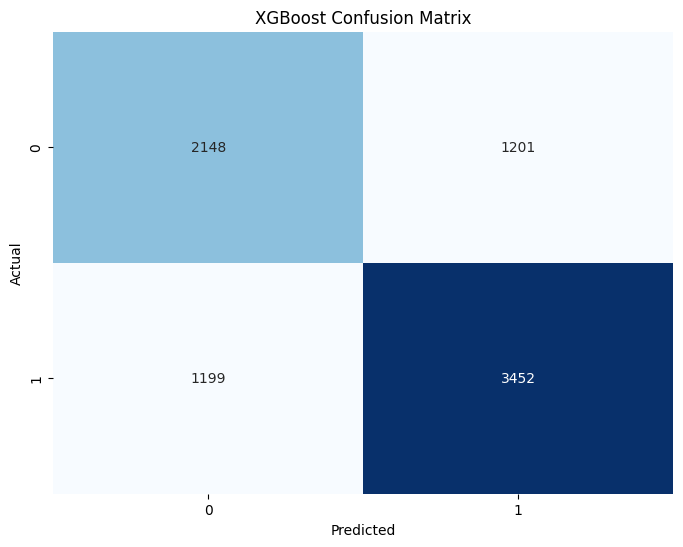

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Prepare the data for modeling (Japanese dataset) - Same as before
X = df_japanese.drop(['ID', 'PURCHASE'], axis=1)
y = df_japanese['PURCHASE']
X = pd.get_dummies(X, columns=['AGE_CAR_BINNED'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #added eval_metric to avoid warning.
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()